Objectives:
Understand the following.
1. Influence of education on salary
2. Relation between years of experience and salary
3. Effect of knowing more than one programming language

In [8]:
import pandas as pd
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

In [9]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [30]:
list(schema[schema['Column'] == 'Salary']['Question'])[0]

'What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?'

1. Formal Education

In [31]:
list(schema[schema['Column'] == 'FormalEducation']['Question'])[0]

"Which of the following best describes the highest level of formal education that you've completed?"

In [24]:
df_FormalEducation = df.groupby(['FormalEducation']).mean().reset_index()
df_FormalEducation[['FormalEducation', 'Salary']].sort_values(by='Salary', ascending=False)

,FormalEducation,Salary
1,Doctoral degree,78527.933053
5,Primary/elementary school,62677.337356
4,Master's degree,58250.838766
0,Bachelor's degree,56914.358553
8,Some college/university study without earning ...,55912.810459
2,I never completed any formal education,44430.660621
7,Secondary school,40395.148419
6,Professional degree,39503.658863
3,I prefer not to answer,38284.836141


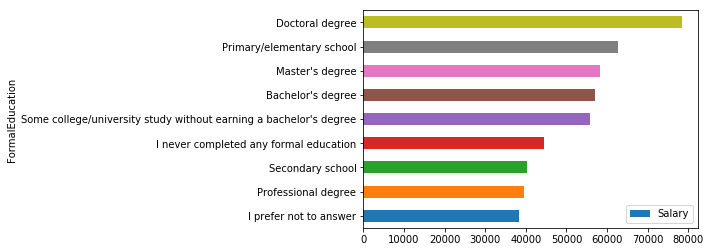

In [27]:
df_FormalEducation = df_FormalEducation[['FormalEducation', 'Salary']].sort_values(by='Salary', ascending=True)
FormalEducation_vs_Salary = df_FormalEducation.plot.barh(x='FormalEducation', y='Salary', rot=0)

Conclusion:
If we don't consider Primary/elementary school as formal education, higher the formal education, higher is the salary.

2. Experience

In [32]:
list(schema[schema['Column'] == 'YearsProgram']['Question'])[0]

'How long has it been since you first learned how to program?'

In [33]:
df_YearsProgram = df.groupby(['YearsProgram']).mean().reset_index()
df_YearsProgram[['YearsProgram', 'Salary']].sort_values(by='Salary', ascending=False)

,YearsProgram,Salary
12,20 or more years,84564.967771
10,19 to 20 years,73926.990204
8,17 to 18 years,73085.731295
9,18 to 19 years,71599.061950
7,16 to 17 years,63898.935647
5,14 to 15 years,63487.522662
6,15 to 16 years,62791.031631
4,13 to 14 years,57149.324680
3,12 to 13 years,55753.347727
2,11 to 12 years,54866.916054


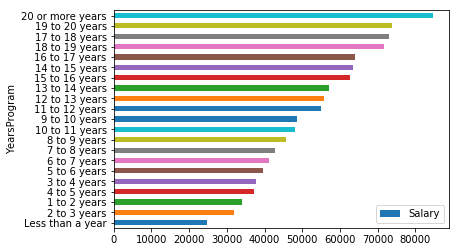

In [36]:
df_YearsProgram = df_YearsProgram[['YearsProgram', 'Salary']].sort_values(by='Salary', ascending=True)
YearsProgram_vs_Salary = df_YearsProgram.plot.barh(x='YearsProgram', y='Salary', rot=0)

Conclusion:
Higher the experience, higher is the salary.

3. Programming Languages Count

In [39]:
list(schema[schema['Column'] == 'HaveWorkedLanguage']['Question'])[0]

'Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?'

In [85]:
df_LanguageCount = df
df_LanguageCount['LanguageCount'] = df_LanguageCount['HaveWorkedLanguage'].str.count(';') + 1
df_LanguageCount = df.groupby(['LanguageCount']).mean().reset_index()
LanguageCountQuantile = df_LanguageCount["LanguageCount"].quantile(0.2)
SalaryQuantile = df_LanguageCount["Salary"].quantile(0.2)
df_LanguageCount = df_LanguageCount[df_LanguageCount["LanguageCount"] > LanguageCountQuantile]
df_LanguageCount = df_LanguageCount[df_LanguageCount["Salary"] > SalaryQuantile]
df_LanguageCount[['LanguageCount', 'Salary']].sort_values(by='LanguageCount', ascending=False)

,LanguageCount,Salary
18,19,82500.000000
16,17,77500.000000
15,16,67597.634409
14,15,70659.319839
13,14,61746.782327
12,13,77245.873750
10,11,59553.938834
9,10,58741.498670
8,9,53301.021354
7,8,57447.874539


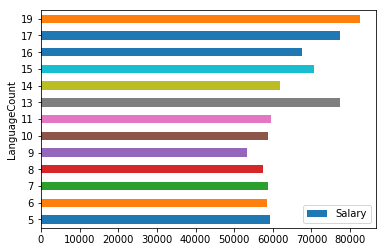

In [86]:
df_LanguageCount = df_LanguageCount[['LanguageCount', 'Salary']].sort_values(by='LanguageCount', ascending=True)
LanguageCount_vs_Salary = df_LanguageCount.plot.barh(x='LanguageCount', y='Salary', rot=0)

Conclusion:
Knowing lot of programming languages does not necessarily increase the salary.